## This jupyter-notebook is a collections of figure-making for 2MFU, 2MKM, and 2M6V.

## 1. Global settings

### 1.1 Global settings for environment and package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import font_manager as fm

In [2]:
!pwd

/home/yuncheng/Work/yuncheng/DFT_optimization/Project_DFT-optimization/27Feb2025_FigureMaking/Project_arranged/18Jun2025_2MFU_2M6V_2MKM_DFT-spectrum


### 1.2 Global settings for Arial font (Varies in different operation system, Windows or Linux)

In [3]:
!pip install fontlib
!fc-match Arial
sorted(fm.get_font_names())
os.getcwd()
font_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"
prop = fm.FontProperties(fname=font_path)

Arial.ttf: "Arial" "Regular"


## 2. Spectrum for DFT and CD fitting.

### Please notes, input files as DFT spectrum after shifting, rescaled, and guassian broadening.

### 2.1 2MFU spectrum (Collapsed G-quadruplex)

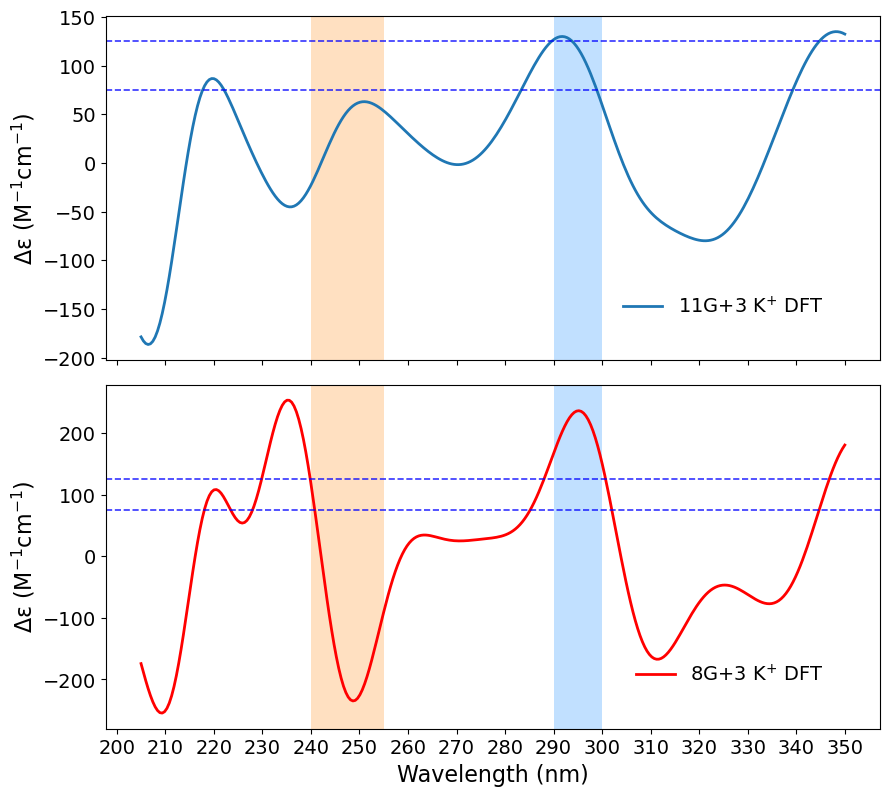

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load spectra ===
csv_path_2MFU_11G_3K = "./csv_DFT/2MFU_11G+3K_DFT.csv"
csv_path_2MFU_8G_3K = "./csv_DFT/2MFU_8G+3K_DFT.csv"

df_11G = pd.read_csv(csv_path_2MFU_11G_3K)
df_8G  = pd.read_csv(csv_path_2MFU_8G_3K)

# === Step 2: Create subplots ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharex=True)

# === First subplot: 11G ===
axes[0].plot(df_11G["Wavelength(nm)"], df_11G["Δε_Gaussian"], color="#1f77b4", linewidth=2, label="11G+3 K$^{+}$ DFT")
axes[0].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[0].set_title("11 Guanosines with 3 K$^{+}$", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# === Second subplot: 8G ===
axes[1].plot(df_8G["Wavelength(nm)"], df_8G["Δε_Gaussian"], color="red", linewidth=2, label="8G+3 K$^{+}$ DFT")
axes[1].set_xlabel("Wavelength (nm)", fontsize=16)
axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[1].set_title("8 Guanosines with 3 K$^{+}$", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# === Step 3: Global settings for range and annotation. ===

# === Step 3.1: Limit X/Y ranges globally ===
#axes[0].set_xlim(200, 350)
# axes[0].set_ylim(-200, 200)
# axes[1].set_ylim(-200, 200)

plt.xticks(np.arange(200, 352, 10), fontsize=14) # Interval of 10 nm
#plt.yticks(fontsize=14)

# === Step 3.2: Color bands — mimic orange/blue zones in reference figure ===
axes[0].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[0].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)

# === Step 3.3: Horizontal cutoffs from CD spectrum  ===
# Horizontal cutoff lines at Δε values
CD_cutoffs = [75, 125]  # y-axis Δε cutoffs
for cutoff in CD_cutoffs:
    axes[0].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    axes[1].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)

# === Step 3.4: Figure legends ===
axes[0].legend(loc='upper right', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.95, 0.24))
axes[1].legend(loc='upper right', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.95, 0.24))
# Save figure to file
plt.tight_layout()
plt.savefig("./Figures/2MFU_spectrum_2systems.png", dpi=300)
plt.show()

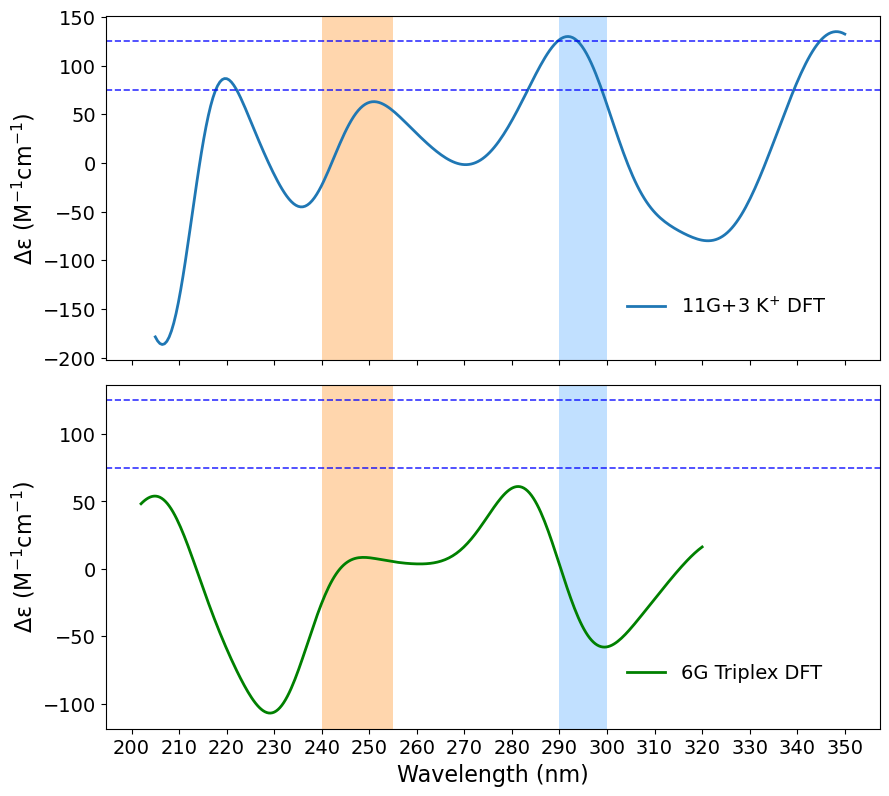

In [36]:
# 2MFU 11G+8G, 2MKM Triplex 6G
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load spectra ===
csv_path_2MFU_11G_3K = "./csv_DFT/2MFU_11G+3K_DFT.csv"
csv_path_2MFU_8G_3K = "./csv_DFT/2MFU_8G+3K_DFT.csv"
csv_path_2MKM_6G_Triplex= "./csv_DFT/2MKM_6G_Triplex_DFT.csv"

df_11G = pd.read_csv(csv_path_2MFU_11G_3K)
df_8G  = pd.read_csv(csv_path_2MFU_8G_3K)
df_2MKM_6G_Triplex = pd.read_csv(csv_path_2MKM_6G_Triplex)

# === Step 2: Create subplots ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharex=True)

# === First subplot: 2MFU 11G+3K ===
axes[0].plot(df_11G["Wavelength(nm)"], df_11G["Δε_Gaussian"], color="#1f77b4", linewidth=2, label="11G+3 K$^{+}$ DFT")
axes[0].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[0].set_title("11 Guanosines with 3 K$^{+}$", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# === Second subplot: 2MFU 8G+3K ===
#axes[1].plot(df_8G["Wavelength(nm)"], df_8G["Δε_Gaussian"], color="red", linewidth=2, label="8G+3 K$^{+}$ DFT")
#axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[1].set_title("8 Guanosines with 3 K$^{+}$", fontsize=16)
#axes[1].tick_params(axis='both', labelsize=14)

# === Third subplot: 2MKM Triplex 6G ===
axes[1].plot(df_2MKM_6G_Triplex["Wavelength(nm)"], df_2MKM_6G_Triplex["Δε_Gaussian"], color="green", linewidth=2, label="6G Triplex DFT")
axes[1].set_xlabel("Wavelength (nm)", fontsize=16)
axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[2].set_title("Triplex", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# === Step 3: Global settings for range and annotation. ===

# === Step 3.1: Limit X/Y ranges globally ===
#axes[0].set_xlim(220, 310)
#axes[1].set_xlim(220, 310)
# axes[1].set_ylim(-200, 200)

plt.xticks(np.arange(200, 352, 10), fontsize=14) # Interval of 10 nm
#plt.yticks(fontsize=14)

# === Step 3.2: Color bands — mimic orange/blue zones in reference figure ===
axes[0].axvspan(240, 255, facecolor='#ffcc99', alpha=0.8, zorder=0, linewidth=1.0)
axes[0].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
#axes[1].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
#axes[1].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(240, 255, facecolor='#ffcc99', alpha=0.8, zorder=0, linewidth=1.0)
axes[1].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)

# === Step 3.3: Horizontal cutoffs from CD spectrum  ===
# Horizontal cutoff lines at Δε values
CD_cutoffs = [75, 125]  # y-axis Δε cutoffs
for cutoff in CD_cutoffs:
    axes[0].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    axes[1].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    #axes[2].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    
# === Step 3.4: Figure legends ===
axes[0].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.65, 0.24))
#axes[1].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.65, 0.24))
axes[1].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.65, 0.24))
               # columnspacing=0.5, # Shorter space gap from 2.0 to 0.5,
               # handletextpad=0.4,
               # bbox_to_anchor=(0.70, 0.28))
# Set tick positions and labels
#for ax in [ax_1stGs, ax_2ndGs, ax_3rdGs, ax_4thGs, ax_1stGs_Pi, ax_2ndGs_Pi, ax_3rdGs_Pi, ax_4thGs_Pi]:
#    ax.xaxis.set_ticks_position('bottom')
#    ax.yaxis.set_ticks_position('left')
#    ax.tick_params(axis='both', direction='in', length=6, width=0.5)
#    ax.locator_params(axis='y', nbins=7) # Set yticks at least 5 ticks are present
    
# Save figure to file
plt.tight_layout()
plt.savefig("./Figures/2MFU+2MKM_spectrum_2systems_version1.png", dpi=300)
plt.show()

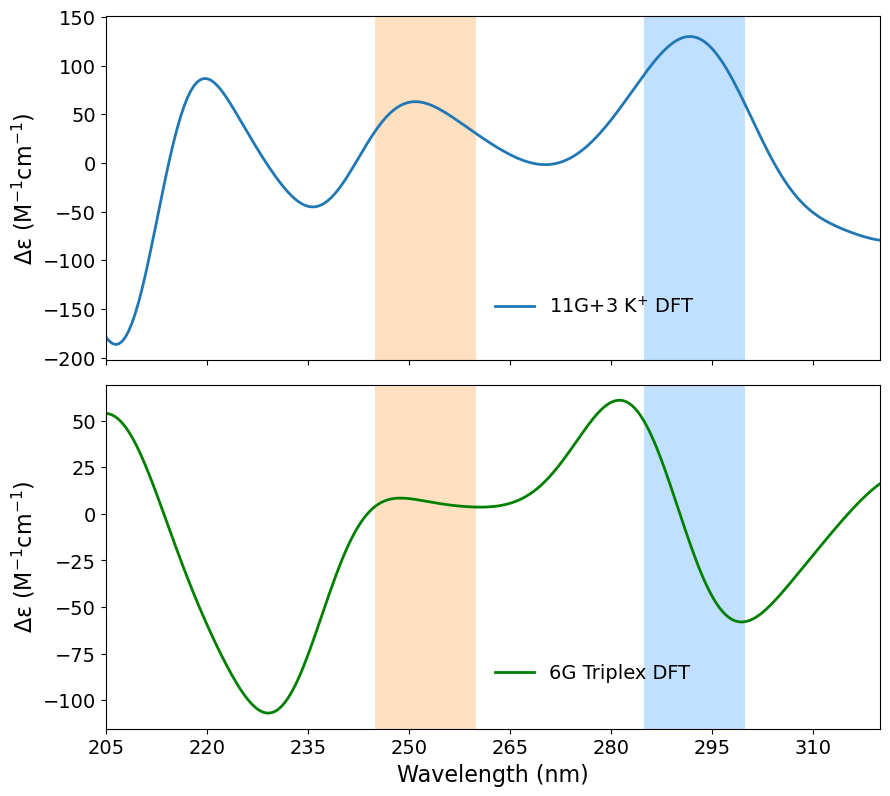

In [26]:
# 2MFU 11G+8G, 2MKM Triplex 6G
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load spectra ===
csv_path_2MFU_11G_3K = "./csv_DFT/2MFU_11G+3K_DFT.csv"
csv_path_2MFU_8G_3K = "./csv_DFT/2MFU_8G+3K_DFT.csv"
csv_path_2MKM_6G_Triplex= "./csv_DFT/2MKM_6G_Triplex_DFT.csv"

df_11G = pd.read_csv(csv_path_2MFU_11G_3K)
df_8G  = pd.read_csv(csv_path_2MFU_8G_3K)
df_2MKM_6G_Triplex = pd.read_csv(csv_path_2MKM_6G_Triplex)

# === Step 2: Create subplots ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharex=True)

# === First subplot: 2MFU 11G+3K ===
axes[0].plot(df_11G["Wavelength(nm)"], df_11G["Δε_Gaussian"], color="#1f77b4", linewidth=2, label="11G+3 K$^{+}$ DFT")
axes[0].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[0].set_title("11 Guanosines with 3 K$^{+}$", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# === Second subplot: 2MFU 8G+3K ===
#axes[1].plot(df_8G["Wavelength(nm)"], df_8G["Δε_Gaussian"], color="red", linewidth=2, label="8G+3 K$^{+}$ DFT")
#axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[1].set_title("8 Guanosines with 3 K$^{+}$", fontsize=16)
#axes[1].tick_params(axis='both', labelsize=14)

# === Third subplot: 2MKM Triplex 6G ===
axes[1].plot(df_2MKM_6G_Triplex["Wavelength(nm)"], df_2MKM_6G_Triplex["Δε_Gaussian"], color="green", linewidth=2, label="6G Triplex DFT")
axes[1].set_xlabel("Wavelength (nm)", fontsize=16)
axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[2].set_title("Triplex", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# === Step 3: Global settings for range and annotation. ===

# === Step 3.1: Limit X/Y ranges globally ===
axes[0].set_xlim(205, 320)
axes[1].set_xlim(205, 320)
#axes[1].set_ylim(-200, 200)
plt.xticks(np.arange(205, 320, 15), fontsize=14) # Interval of 10 nm
#plt.yticks(fontsize=14)
#plt.set_xlim(220, 310)

# === Step 3.2: Color bands — mimic orange/blue zones in reference figure ===
axes[0].axvspan(245, 260, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[0].axvspan(285, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
#axes[1].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
#axes[1].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(245, 260, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(285, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)

# === Step 3.3: Horizontal cutoffs from CD spectrum  ===
# Horizontal cutoff lines at Δε values
#CD_cutoffs = [75, 125]  # y-axis Δε cutoffs
#for cutoff in CD_cutoffs:
#    axes[0].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
#    axes[1].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    #axes[2].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    
# === Step 3.4: Figure legends ===
axes[0].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.48, 0.24))
#axes[1].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.65, 0.24))
axes[1].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.48, 0.24))
               # columnspacing=0.5, # Shorter space gap from 2.0 to 0.5,
               # handletextpad=0.4,
               # bbox_to_anchor=(0.70, 0.28))
# Set tick positions and labels
#for ax in [ax_1stGs, ax_2ndGs, ax_3rdGs, ax_4thGs, ax_1stGs_Pi, ax_2ndGs_Pi, ax_3rdGs_Pi, ax_4thGs_Pi]:
#    ax.xaxis.set_ticks_position('bottom')
#    ax.yaxis.set_ticks_position('left')
#    ax.tick_params(axis='both', direction='in', length=6, width=0.5)
#    ax.locator_params(axis='y', nbins=7) # Set yticks at least 5 ticks are present
    
# Save figure to file
plt.tight_layout()
plt.savefig("./Figures/2MFU+2MKM_spectrum_2systems_version2.png", dpi=300)
plt.show()

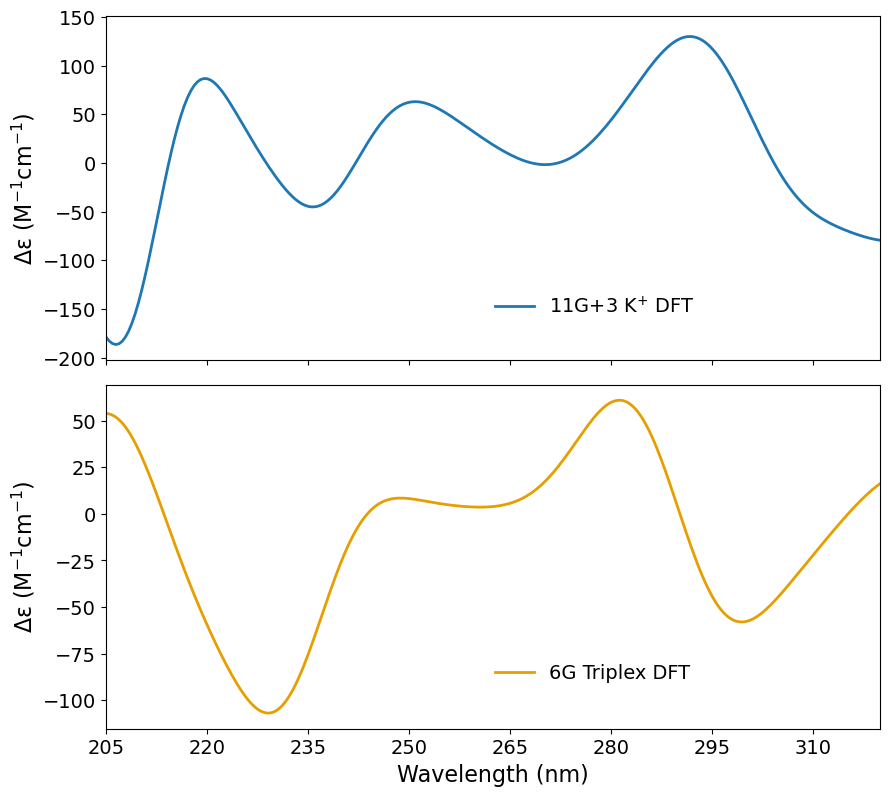

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Palette (Okabe–Ito; colorblind-friendly) ===
SVD_S1_BLUE   = "#56B4E9"  # Blue
SVD_S2_ORANGE = "#E69F00"  # Orange in S2
SVD_S3_GREEN  = "#009E73"  # Green 绿
BAND_BLUE     = "#56B4E9"
BAND_YELLOW   = '#ffcc99'
#FED976" another yellow for color bar 

# === Step 1: Load spectra ===
csv_path_2MFU_11G_3K = "./csv_DFT/2MFU_11G+3K_DFT.csv"
csv_path_2MFU_8G_3K  = "./csv_DFT/2MFU_8G+3K_DFT.csv"
csv_path_2MKM_6G_Triplex= "./csv_DFT/2MKM_6G_Triplex_DFT.csv"

df_11G = pd.read_csv(csv_path_2MFU_11G_3K)
df_8G  = pd.read_csv(csv_path_2MFU_8G_3K)
df_2MKM_6G_Triplex = pd.read_csv(csv_path_2MKM_6G_Triplex)

# === Step 2: Create subplots ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharex=True)

# === First subplot: 2MFU 11G+3K ===
axes[0].plot(df_11G["Wavelength(nm)"], df_11G["Δε_Gaussian"],
             color="#1f77b4", linewidth=2, label="11G+3 K$^{+}$ DFT")
axes[0].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# === Third subplot: 2MKM Triplex 6G ===
axes[1].plot(df_2MKM_6G_Triplex["Wavelength(nm)"], df_2MKM_6G_Triplex["Δε_Gaussian"],
             color=SVD_S2_ORANGE, linewidth=2, label="6G Triplex DFT")
axes[1].set_xlabel("Wavelength (nm)", fontsize=16)
axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# === Step 3: Global settings ===
axes[0].set_xlim(205, 320)
axes[1].set_xlim(205, 320)
plt.xticks(np.arange(205, 320, 15), fontsize=14)

# --- Colored bands: 
#for ax in axes:
#    ax.axvspan(245, 260, facecolor=BAND_YELLOW, alpha=0.8, zorder=0, edgecolor="none")
#    ax.axvspan(285, 300, facecolor=BAND_BLUE,   alpha=0.5, zorder=0, edgecolor="none")

# === Legends ===
axes[0].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.48, 0.24))
axes[1].legend(loc='upper left', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.48, 0.24))

plt.tight_layout()
plt.savefig("./Figures/2MFU+2MKM_spectrum_2systems_version3.png", dpi=300)
plt.show()

### 2.2 2MKM spectrum (Triplex, Partical-Triplex, Hairpin, Cryptand) 

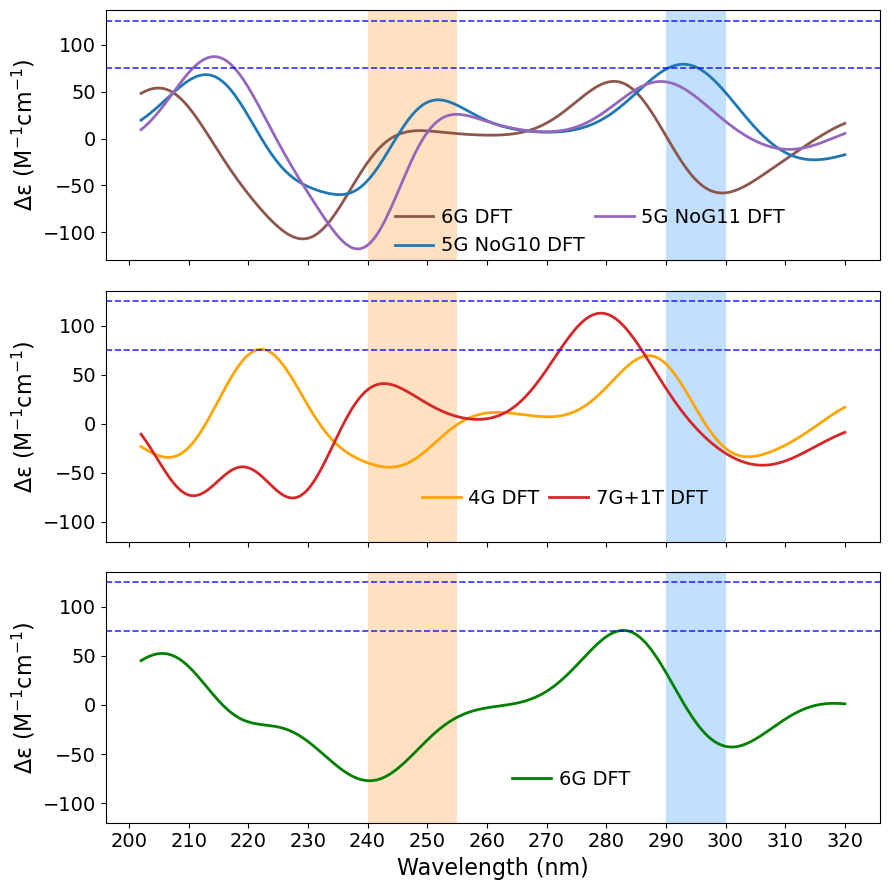

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load spectra ===
csv_path_2MKM_4G_Hairpin = "./csv_DFT/2MKM_4G_Hairpin_DFT.csv"
csv_path_2MKM_5G_NoG10_Partial_Triplex = "./csv_DFT/2MKM_5G_NoG10_Partial-Triplex_DFT.csv"
csv_path_2MKM_5G_NoG11_Partial_Triplex = "./csv_DFT/2MKM_5G_NoG11_Partial-Triplex_DFT.csv"
csv_path_2MKM_6G_Cryptand2 = "./csv_DFT/2MKM_6G_Cryptand2_DFT.csv"
csv_path_2MKM_6G_Triplex= "./csv_DFT/2MKM_6G_Triplex_DFT.csv"
csv_path_2MKM_7G_1T_Hairpin = "./csv_DFT/2MKM_7G+1T_Hairpin_DFT.csv"

df_2MKM_4G_Hairpin = pd.read_csv(csv_path_2MKM_4G_Hairpin)
df_2MKM_5G_NoG10_Partial_Triplex = pd.read_csv(csv_path_2MKM_5G_NoG10_Partial_Triplex)
df_2MKM_5G_NoG11_Partial_Triplex = pd.read_csv(csv_path_2MKM_5G_NoG11_Partial_Triplex)
df_2MKM_6G_Cryptand2 = pd.read_csv(csv_path_2MKM_6G_Cryptand2)
df_2MKM_6G_Triplex = pd.read_csv(csv_path_2MKM_6G_Triplex)
df_2MKM_7G_1T_Hairpin = pd.read_csv(csv_path_2MKM_7G_1T_Hairpin)

# === Step 2: Create subplots ===
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 9), sharex=True)

# === First subplot: Triplex and Partial-Triplex ===
axes[0].plot(df_2MKM_6G_Triplex["Wavelength(nm)"], df_2MKM_6G_Triplex["Δε_Gaussian"], color="#8c564b", linewidth=2, label="6G DFT")
axes[0].plot(df_2MKM_5G_NoG10_Partial_Triplex["Wavelength(nm)"], df_2MKM_5G_NoG10_Partial_Triplex["Δε_Gaussian"], color="#1f77b4", linewidth=2, label="5G NoG10 DFT")
axes[0].plot(df_2MKM_5G_NoG11_Partial_Triplex["Wavelength(nm)"], df_2MKM_5G_NoG11_Partial_Triplex["Δε_Gaussian"], color="#9467bd", linewidth=2, label="5G NoG11 DFT")
axes[0].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[0].set_title("Triplex", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# === Second subplot: Hairpin ===
axes[1].plot(df_2MKM_4G_Hairpin["Wavelength(nm)"], df_2MKM_4G_Hairpin["Δε_Gaussian"], color="orange", linewidth=2, label="4G DFT")
axes[1].plot(df_2MKM_7G_1T_Hairpin["Wavelength(nm)"], df_2MKM_7G_1T_Hairpin["Δε_Gaussian"], color="#d62728", linewidth=2, label="7G+1T DFT")
axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[1].set_title("Hairpin", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# === Third subplot: Cryptand ===
axes[2].plot(df_2MKM_6G_Cryptand2["Wavelength(nm)"], df_2MKM_6G_Cryptand2["Δε_Gaussian"], color="green", linewidth=2, label="6G DFT")
axes[2].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[2].set_title("Cryptand", fontsize=16)
axes[2].tick_params(axis='both', labelsize=14)
axes[2].set_xlabel("Wavelength (nm)", size=16)

# === Step 3: Global settings for range and annotation. ===

# === Step 3.1: Limit X/Y ranges globally ===
#axes[0].set_xlim(200, 350)
# axes[0].set_ylim(-200, 200)
# axes[1].set_ylim(-200, 200)

plt.xticks(np.arange(200, 352, 10), fontsize=14) # Interval of 10 nm
#axes[0].set_ylim(-120, 135) # For cryptand subplot
axes[1].set_ylim(-120, 135) # For cryptand subplot
axes[2].set_ylim(-120, 135) # For cryptand subplot

#plt.yticks(fontsize=14)

# === Step 3.2: Color bands — mimic orange/blue zones in reference figure ===
axes[0].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[0].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
axes[2].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[2].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)

# === Step 3.3: Horizontal cutoffs from CD spectrum  ===
# Horizontal cutoff lines at Δε values
CD_cutoffs = [75, 125]  # y-axis Δε cutoffs
for cutoff in CD_cutoffs:
    axes[0].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    axes[1].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    axes[2].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    
# === Step 3.4: Figure legends ===
axes[0].legend(loc='upper right', fontsize=14, frameon=False, ncol=2,
               columnspacing=0.5, # Shorter space gap from 2.0 to 0.5,
               handletextpad=0.4,
               bbox_to_anchor=(0.90, 0.28))
axes[1].legend(loc='upper right', fontsize=14, frameon=False, ncol=2,
               columnspacing=0.5, # Shorter space gap from 2.0 to 0.5,
               handletextpad=0.4,
               bbox_to_anchor=(0.80, 0.28))
axes[2].legend(loc='upper right', fontsize=14, frameon=False, ncol=1,
               columnspacing=0.5, # Shorter space gap from 2.0 to 0.5,
               handletextpad=0.4,
               bbox_to_anchor=(0.70, 0.28))

# Save figure to file
plt.tight_layout()
plt.savefig("./Figures/2MKM_spectrum_6systems.png", dpi=300)
plt.show()

### 2.3 2M6V spectrum (Collapsed G-quadruplex)

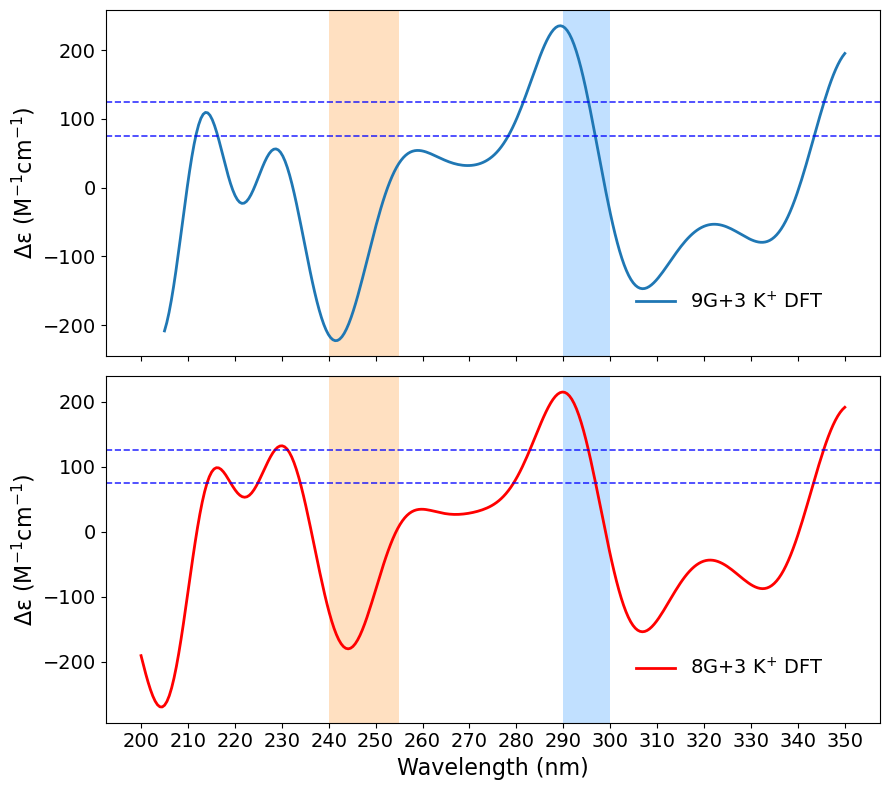

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load spectra ===
csv_path_2M6V_9G_3K = "./csv_DFT/2M6V_9G+3K_DFT.csv"
csv_path_2M6V_8G_3K = "./csv_DFT/2M6V_8G+3K_DFT.csv"

df_2M6V_9G_3K = pd.read_csv(csv_path_2M6V_9G_3K)
df_2M6V_8G_3K  = pd.read_csv(csv_path_2M6V_8G_3K)

# === Step 2: Create subplots ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharex=True)

# === First subplot: 11G ===
axes[0].plot(df_2M6V_9G_3K["Wavelength(nm)"], df_2M6V_9G_3K["Δε_Gaussian"], color="#1f77b4", linewidth=2, label="9G+3 K$^{+}$ DFT")
axes[0].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[0].set_title("9 Guanosines with 3 K$^{+}$", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# === Second subplot: 8G ===
axes[1].plot(df_2M6V_8G_3K["Wavelength(nm)"], df_2M6V_8G_3K["Δε_Gaussian"], color="red", linewidth=2, label="8G+3 K$^{+}$ DFT")
axes[1].set_xlabel("Wavelength (nm)", fontsize=16)
axes[1].set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
#axes[1].set_title("8 Guanosines with 3 K$^{+}$", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# === Step 3: Global settings for range and annotation. ===

# === Step 3.1: Limit X/Y ranges globally ===
#axes[0].set_xlim(200, 350)
# axes[0].set_ylim(-200, 200)
# axes[1].set_ylim(-200, 200)

plt.xticks(np.arange(200, 352, 10), fontsize=14) # Interval of 10 nm
#plt.yticks(fontsize=14)

# === Step 3.2: Color bands — mimic orange/blue zones in reference figure ===
axes[0].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[0].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
axes[1].axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)

# === Step 3.3: Horizontal cutoffs from CD spectrum  ===
# Horizontal cutoff lines at Δε values
CD_cutoffs = [75, 125]  # y-axis Δε cutoffs
for cutoff in CD_cutoffs:
    axes[0].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)
    axes[1].axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)

# === Step 3.4: Figure legends ===
axes[0].legend(loc='upper right', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.95, 0.24))
axes[1].legend(loc='upper right', fontsize=14, frameon=False, ncol=1, bbox_to_anchor=(0.95, 0.24))
# Save figure to file
plt.tight_layout()
plt.savefig("./Figures/2M6V_spectrum_2systems.png", dpi=300)
plt.show()